In [1]:
from vedo import *
import os
from ipyvtklink.viewer import ViewInteractiveWidget
import pykitti
import numpy as np
import tensorflow as tf

#limit GPU memory ------------------------------------------------
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    memlim = 4*1024
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
  except RuntimeError as e:
    print(e)
#-----------------------------------------------------------------

from tensorflow.math import sin, cos, tan
import tensorflow_probability as tfp
import os
import mat4py
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
%autosave 180
%matplotlib notebook

2022-11-02 12:53:21.345564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 12:53:21.434163: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 12:53:21.784272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/derm/anaconda3/envs/py39/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-02 12:53:21.784323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_p

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Autosaving every 180 seconds


In [2]:
#read in raw PCAP files from Volpe
import velodyne_decoder as vd
config = vd.Config(model="VLP-16", rpm = 600)
pcap_file = '/media/derm/06EF-127D1/volpe/2021-03-10-16-43-50_Velodyne-VLP-16-Data_garminSignage.pcap'

cloud_arrays = []
stamps = []
for stamp, points in vd.read_pcap(pcap_file, config):
    cloud_arrays.append(points)
    stamps.append(stamp)

In [3]:
from ICET_spherical import ICET
idx = 4000 #frame idx
D  = True #draw scene
X = tf.constant([0., 0., 0., 0., 0., 0.]) #initial transformation estimate

#cloud_arrays ..... [5622][x, y, z, intensity, ring, time]
pc1 = cloud_arrays[idx][:,:3]
pc2 = cloud_arrays[idx+1][:,:3]

pc1 = pc1[pc1[:,2] > -2]
pc2 = pc2[pc2[:,2] > -2]

it1 = ICET(cloud1 = pc1, cloud2 = pc2,  fid = 30, draw = D, x0 = X, 
           niter = 5, group= 2, RM = True, DNN_filter = False)
ViewInteractiveWidget(it1.plt.window)


2022-11-02 12:54:11.191454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 12:54:11.192258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 12:54:11.192443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 12:54:11.192562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer


 estimated solution vector X: 
 tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)


2022-11-02 12:54:13.108773: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-02 12:54:13.309701: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x8af5bd10



 estimated solution vector X: 
 tf.Tensor([-0.00195798  0.012107   -0.00123885  0.00053858  0.00051014  0.00325257], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00188221  0.01394323 -0.00131361  0.00059337  0.00056209  0.00419214], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00173715  0.01621562 -0.00137447  0.00059467  0.00061103  0.00495661], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00174714  0.01642963 -0.00140428  0.00063366  0.00062879  0.00508109], shape=(6,), dtype=float32)

 ---checking for moving objects---
pred_stds: 
 tf.Tensor([0.00202887 0.00686436 0.00390751 0.00106887 0.00154146 0.00123248], shape=(6,), dtype=float32)
 L2: 
 tf.Tensor(
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]], shape=(6, 6), dtype=float32)


ViewInteractiveWidget(height=1043, layout=Layout(height='auto', width='100%'), width=1280)

In [4]:
print(it1.X)
print(it1.pred_stds)

tf.Tensor(
[-2.0555872e-03  5.7025636e-03 -2.5982254e-03  9.0743706e-05
  9.5032353e-04  2.1468899e-03], shape=(6,), dtype=float32)
tf.Tensor([0.00202887 0.00686436 0.00390751 0.00106887 0.00154146 0.00123248], shape=(6,), dtype=float32)


In [ ]:
from ICET_spherical import ICET

runlen = 5621
estimate_history = np.zeros([runlen,6])
pred_stds = np.zeros([runlen,6])
lam_hist = np.zeros([runlen, 6, 6])

err_cnt = 0
X = tf.constant([0., 0., 0., 0., 0., 0.]) #initial transformation estimate

for idx in range(400, runlen):
    
    print("\n --- idx ---", idx)
    
    #cloud_arrays ..... [5622][x, y, z, intensity, ring, time]
    pc1 = cloud_arrays[idx][:,:3]
    pc2 = cloud_arrays[idx+1][:,:3]
    
    pc1 = pc1[pc1[:,2] > -2] #remove ground plane
    pc2 = pc2[pc2[:,2] > -2]

    try:
        it = ICET(cloud1 = pc1, cloud2 = pc2,  fid = 30, draw = False, x0 = X,
                   niter = 5, group= 2, RM = True, DNN_filter = False)

        estimate_history[idx,:] = it.X
        pred_stds[idx,:] = it.pred_stds
        lam_hist[idx,:,:] = it.lam
        print(it.lam)
        
#         if it.X[0] > 0 and (abs(it.X[5]) < 0.5):
#             X = it.X
#         else:
#             X = tf.constant([0., 0., 0., 0., 0., 0.]) #initial transformation estimate
        
    except:
        print("ICET ERROR")
        err_cnt +=1
        
save_fn = "ICET_signage_fid30v2" #with condition check
np.save(save_fn + "_estimates", estimate_history)
np.save(save_fn + "_pred_stds", pred_stds)
np.save(save_fn + "_lam", lam_hist)

v1 .... mnp=50, fid=50, x0=0

In [59]:
lam = np.load("ICET_signage_fid40_lam.npy")
cond_bad = np.zeros(len(lam))
thresh = 1e6
for i in range(len(lam)):
#     print(i)
    cond = lam[i, 0, 0] / lam[i, -1, -1]
    if cond > thresh:
        cond_bad[i] = 1
print(cond_bad)
no_fwd_info = np.where(cond_bad == 1)
print(no_fwd_info)

[0. 0. 0. ... 0. 0. 0.]
(array([ 403,  457,  469,  498,  499,  502,  503,  504,  505,  507,  510,
        511,  512,  513,  514,  515,  516,  517,  518,  519,  520,  522,
        527,  528,  536,  538,  540,  555,  556,  559,  560,  561,  562,
        566,  569,  573,  581,  582,  585,  586,  609,  610,  633,  634,
        641,  642,  659,  665,  666,  681,  687,  689,  690,  691,  693,
        694,  695,  696,  698,  700,  720,  721,  722,  723,  724,  725,
        726,  727,  728,  729,  730,  731,  732,  733,  734,  735,  736,
        737,  738,  739,  740,  741,  742,  743,  745,  746,  747,  748,
        749,  751,  752,  753,  754,  755,  756,  757,  764,  765,  772,
        773,  775,  776,  778,  779,  780,  783,  784,  785,  786,  794,
        797,  812,  819,  829,  830,  832,  833,  834,  838,  843,  846,
        847,  848,  849,  852,  861,  894,  913,  914,  915,  916,  917,
        918, 1001, 1023, 1026, 1027, 1035, 1037, 1038, 1039, 1043, 1044,
       1045, 1047, 1048, 1

/tmp/ipykernel_33204/1696305077.py:6: RuntimeWarning: invalid value encountered in double_scalars
  cond = lam[i, 0, 0] / lam[i, -1, -1]


(5621, 6)
(5668, 6)
[1. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


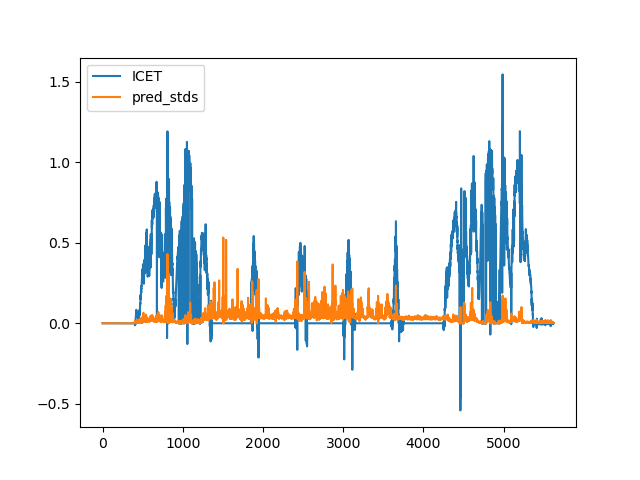

In [60]:
# estimate_history = np.load("ICET_signage_fid50_estimates.npy") 
estimate_history = np.load("ICET_signage_fid30_estimates.npy") #fid30 way better than fid50 for the 16 channel sensor
pred_stds = np.load("ICET_signage_fid30_pred_stds.npy")
# pred_stds = np.load("ICET_signage_fid50_estimates.npy") #debug
print(np.shape(estimate_history))

# # NDT keyframing every new scan ----------------------------------
# # NDT_raw = np.loadtxt("NDT_results_pt5m_signage.txt")
# NDT_raw = np.loadtxt("NDT_results_2m_signage.txt")
# # NDT_raw = np.loadtxt("NDT_results_signage.txt")
# #-----------------------------------------------------------------

# NDT dynamic keyframing -----------------------------------------
# NDT_raw = np.loadtxt("NDT_results_v5d1_noRejection_signage.txt")
# keyframe_idx = np.loadtxt("NDT_keyframes_v5d1_noRejection_signage.txt")[1:]
# NDT_raw = np.loadtxt("NDT_results_v2pt5d1_noRejection_signage.txt")
# keyframe_idx = np.loadtxt("NDT_keyframes_v2pt5d1_noRejection_signage.txt")[1:]

NDT_raw = np.loadtxt("NDT_results_v2pt5d1_signage_v2.txt")
keyframe_idx = np.loadtxt("NDT_keyframes_v2pt5d1_signage_v2.txt")[:-1]

NDT_raw = keyframe_idx[:,None]*NDT_raw
# NDT_raw[:,:3] = keyframe_idx[:,None]*NDT_raw[:,:3] #test
# NDT_raw[:,3:] = np.deg2rad(NDT_raw[:,3:]) #test

# NDT_raw[:5621,3] = -estimate_history[:,5] #DEBUG - cheat by copying rotations from ICET

print(np.shape(NDT_raw))
print(keyframe_idx)

#-----------------------------------------------------------------


#zero out negative forward movement
# estimate_history[estimate_history[:,0] < 0, 0] = 0
# NDT_raw[NDT_raw[:,1] < 0, 1] = 0

#suppress motion in periods where vehicle is parked 
estimate_history[1360:1850] = 0
estimate_history[1950:2400] = 0
estimate_history[2550:3000] = 0
estimate_history[3150:3600] = 0
estimate_history[3750:4250] = 0


component = 0 #x
# component = 5 #yaw

fig, ax = plt.subplots()
ax.plot(estimate_history[:,component], label = "ICET")
ax.plot(pred_stds[:,component], label = "pred_stds")
vf = np.sqrt(estimate_history[:,0]**2 + estimate_history[:,1]**2)
# ax.plot(vf, label = "total vf ICET")
# ax.plot(NDT_raw[:,1], label = "NDT")
ax.legend(loc = "best")
# ax.plot(np.diff(gps, axis = 0)[:,1])


# Plot East/ North trajectory of ground truth, NDT, and ICET

(2851, 7)


<IPython.core.display.Javascript object>


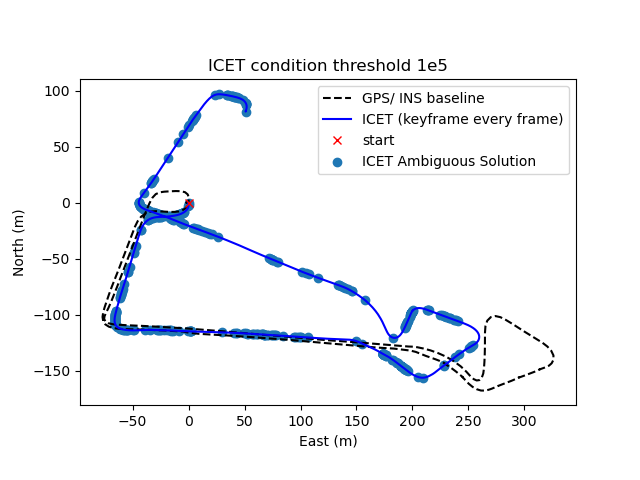

In [61]:
#load MatLab files
cwd = os.getcwd()
vp = os.path.dirname(os.path.realpath(cwd)) + "/volpe/" #Volpe Path

gtfn = vp + "gps_enu.mat"
gt = np.transpose(mat4py.loadmat(gtfn)['gps_enu']) 

NDTfn = vp + "pos_lidar_enu.mat"
NDT = np.asarray(mat4py.loadmat(NDTfn)['pos_lidar_enu'])
print(np.shape(NDT))

# -----------------------------------------------
# print(np.shape(estimate_history))
ICET_total = np.zeros(np.shape(estimate_history))
NDT_total = np.zeros(np.shape(NDT_raw))
for i in range(np.shape(estimate_history)[0]):
    ICET_total[i] = np.sum(estimate_history[:i], axis = 0)
    NDT_total[i] = np.sum(NDT_raw[:i], axis = 0)

ICET_total[:,5] += np.deg2rad(90) #set initial rotation
NDT_total[:,5] += np.deg2rad(90)
    
#need to combine TOTAL heading with incremental changes in x and y (really should be ignoring y...)
ICET_traj = np.zeros([np.shape(estimate_history)[0], 2])
NDT_traj = np.zeros([np.shape(estimate_history)[0], 2])

for j in range(1, np.shape(estimate_history)[0]):
    #x[i] = x[i-1] + step_dist*cos(heading)z
    ICET_traj[j,0] = ICET_traj[j-1,0] +estimate_history[j,0]*np.cos(ICET_total[j,5])
#     ICET_traj[j,0] = ICET_traj[j-1,0] + vf[j]*np.cos(ICET_total[j,5])
    NDT_traj[j,0] = NDT_traj[j-1,0] + NDT_raw[j,1]*np.cos(-NDT_total[j,3])

    #y[i] = y[i-1] + step_dist*sin(heading)
    ICET_traj[j,1] = ICET_traj[j-1,1] + estimate_history[j,0]*np.sin(ICET_total[j,5])
#     ICET_traj[j,1] = ICET_traj[j-1,1] + vf[j]*np.sin(ICET_total[j,5])
    NDT_traj[j,1] = NDT_traj[j-1,1] + NDT_raw[j,1]*np.sin(-NDT_total[j,3])
# -----------------------------------------------

#plot xy total positions
fig, ax = plt.subplots(1,1)
ax.set_aspect('equal')
ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_title("ICET condition threshold 1e5")

font = {'fontname':'Times New Roman'}
ax.plot(gt[:,0], gt[:,1], 'k--', label = "GPS/ INS baseline")
# ax.plot(NDT[:,0], NDT[:,1], label = "NDT (Tuned)") #using pre-made NDT trajectory
# ax.plot(NDT_traj[:,1], -NDT_traj[:,0], 'g', label = "NDT (v2.5 d1 seeded)") #debug NDT trajectory inherited from MatLab code"
ax.plot(-ICET_traj[:,0], -ICET_traj[:,1], 'b', label = "ICET (keyframe every frame)")
ax.plot(0, 'rx', label = "start")
ax.scatter(-ICET_traj[no_fwd_info,0], -ICET_traj[no_fwd_info,1], label = "ICET Ambiguous Solution")
ax.legend(loc = 'best')

In [28]:
# interpolate GPS ground truth to lidar time basis
import mat4py
# gps = np.array(mat4py.loadmat("/home/derm/ASAR/volpe/gps_enu.mat")['gps_enu'])
# lidartime = np.array(mat4py.loadmat("/home/derm/ASAR/volpe/lidar_time.mat")['t'])
lidartime = np.array(stamps)[:-1]
print(lidartime)

gps = np.loadtxt("gps_pos_enu_lidartime.txt")

#make gps and lidar both start at t=0
gps[:,0] = gps[:,0] - gps[0,0]
lidartime -= lidartime[0]

# fig, ax = plt.subplots()
# ax.set_xlabel("frame")
# ax.set_ylabel("timestamp")

# ax.plot(gps[:,0], label = 'gps time')
# ax.plot(lidartime, label = 'lidar time')
# ax.legend(loc = 'best')

# print(gps)

[1.61541264e+09 1.61541264e+09 1.61541264e+09 ... 1.61541321e+09
 1.61541321e+09 1.61541321e+09]


In [ ]:
#plot total forward translation of ICET with error bounds

fig, ax = plt.subplots()
ax.set_xlabel("time (s)")
ax.set_ylabel("total forward translation, vehicle body frame (m)")
ax.set_title("ICET vs NDT")
ax.plot(lidartime, ICET_total[:,0], label = "ICET estimates", color = 'blue')
ax.plot(lidartime, NDT_total[:5621,1], label = "NDT estimates (v2.5d1)", color = 'green')

#--------------------------------------------------
# get cumulative ICET error bounds
cum_err = np.zeros(np.shape(pred_stds))
for i in range(np.shape(pred_stds)[0]):
    cum_err[i,:] = np.sum(pred_stds[:i,:]**2, axis = 0)
    cum_err[i,:] += np.sqrt(2)*np.array([0.05,0.05,0.1,0.0005,0.0005,0.001])**2#add in baseline OXTS 1-sigma errors
    cum_err[i,:] = np.sqrt(cum_err[i,:]) 
#--------------------------------------------------

frame = 400
print(cum_err[frame:frame+5])
print(pred_stds[frame:frame+5])

gps_cum = np.zeros(np.shape(gps)[0])
dgps = abs(np.diff(gps, axis = 0))
dgps_fwd = np.sqrt(dgps[:,1]**2 + dgps[:,2]**2)
for i in range(np.shape(gps)[0]):
    gps_cum[i] = np.sum(dgps_fwd[:i], axis = 0)

    
#interpolate gps_cum
gps_time = gps[:,0]
gps_cum_lidartime = np.interp(lidartime, gps_time, gps_cum) #(newtime, oldtime, oldpos)
# gps_time = range(27, np.shape(gps_cum)[0]+27) #for debug
# ax.plot(gps_time, gps_cum, 'k--', label = "GPS/INS baseline") #for debug
ax.plot(lidartime, gps_cum_lidartime, 'k--', label = "GPS/INS baseline")
# ax.fill_between(lidartime, gps_cum_lidartime -2*cum_err[:,1], gps_cum_lidartime + 2*cum_err[:,1], 
#              color = (0,0,1,0.2), label = 'Predicted 2σ Error Bounds')
ax.legend(loc = 'best')

In [ ]:
#plot total error in forward translation for each method

fig, ax = plt.subplots()
ax.plot(lidartime, gps_cum_lidartime*0, 'k--' ) #zero baseline
ax.set_xlabel("time (s)")

#cumulative
ax.plot(lidartime,  ICET_total[:,0] - gps_cum_lidartime, label = "ICET estimates", color = 'blue')
ax.plot(lidartime,  NDT_total[:5621,1] - gps_cum_lidartime, label = "NDT estimates", color = 'green')
ax.fill_between(lidartime, -2*cum_err[:,1], 2*cum_err[:,1], 
             color = (0,0,1,0.2), label = 'ICET Predicted 2σ Error Bounds')
ax.set_ylabel("cumulative error in forward translation, vehicle body frame (m)")
ax.set_title("Cumulative error, keyframe every 1m")

#per frame
# ax.plot(lidartime[:-1], np.diff(gps_cum_lidartime - ICET_total[:,0]), label = "ICET estimates", color = 'blue')
# ax.plot(lidartime[:-1], np.diff(gps_cum_lidartime - NDT_total[:5621,1]), label = "NDT estimates", color = 'green')
# ax.fill_between(lidartime, -2*pred_stds[:,0], 2*pred_stds[:,0], 
#                  color = (0.5,0.5,0.5,0.4), label = 'ICET Predicted 2σ Error Bounds')
# ax.set_ylabel("per-frame error in forward translation, vehicle body frame (m)")
# ax.set_title("per-frame error, keyframe every frame")


ax.legend(loc='best')

In [ ]:
#TEST- load liar velocity estimated by Volpe
import pandas as pd
from scipy.spatial.transform import Rotation

volpe_lidar_raw = vp + "relPos_lidar.mat"
NDT_raw = np.asarray(mat4py.loadmat(volpe_lidar_raw)['relPos_lidar'])#[:,:3]
NDT_trans = NDT_raw[:,:3]

#not sure why this file is half the length of the full rel pos...
# volpe_lidar_raw_rot = vp + "yaw_lidar.mat"
# NDT_rot = np.asarray(mat4py.loadmat(volpe_lidar_raw_rot)['yaw_lidar'])
# print(np.shape(NDT_rot))

rot = Rotation.from_quat(NDT_raw[1:,3:])
rot_euler = rot.as_euler('xyz', degrees=True)
NDT_rot = pd.DataFrame(data=rot_euler, columns=['x', 'y', 'z']).to_numpy()

print(np.shape(NDT_trans))
print(np.shape(NDT_rot))

print(NDT_trans[2500])